In [1]:
#make new IF datasets for formula 1 autoscrambler training 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#CODE FOR BREAKING UP TRAINING/TESTING DATASET
#split up ORF functions 
#optimus 5' code to find inframe and out of frame uORFS
def inframe_aug_vector(utr, kozak_len, exclude_inframe_stop, codon='ATG'):
    #finds inframe augs 
    frame = 0-len(utr)%3
    #print (frame)
    cds = 'ATGGG'
    #cds = ''
    stops = ['TAA', 'TGA', 'TAG']
    for i in range(0, len(utr) - 2):         
        if frame == -1:
            if utr[i:i+3] == codon:
                if (i + len(cds) > len(utr)):
                    cds_to_add = cds[:i + len(cds) - len(utr)]
                    stop_info = find_stop(utr, i)
                    return -1, utr[i-kozak_len:len(utr)+1] + cds_to_add, stop_info[0], stop_info[1], i
                else:
                    stop_info = find_stop(utr, i)
                    return -1, utr[i-kozak_len:i + len(cds)], stop_info[0], stop_info[1], i

            frame += 1
            continue
        
        if frame == -2:
            if utr[i:i+3] == codon:
                if (i + len(cds) > len(utr)):
                    cds_to_add = cds[:i + len(cds) - len(utr)]
                    stop_info = find_stop(utr, i)
                    return -2, utr[i-kozak_len:len(utr)+1] + cds_to_add, stop_info[0], stop_info[1], i
                else:
                    stop_info = find_stop(utr, i)
                    return -2, utr[i-kozak_len:i + len(cds)], stop_info[0], stop_info[1], i
            
            frame += 1
        
        if frame == 0:
            if utr[i:i+3] == codon:
                if (i + len(cds) > len(utr)):
                    cds_to_add = cds[:i + len(cds) - len(utr)]
                    stop_info = find_stop(utr, i)
                    return 0, utr[i-kozak_len:len(utr)+1] + cds_to_add, stop_info[0], stop_info[1], i
                else:
                    stop_info = find_stop(utr, i)
                    return 0, utr[i-kozak_len:i + len(cds)], stop_info[0], stop_info[1], i                 
            frame = -2
            
    # return the intended start codon if no uAUGs are found
    uorf_len = 0
    stop_index = 0
    uaug_index = 0
    return 3, utr[len(utr)-kozak_len:len(utr)+1] + cds, uorf_len, stop_index, uaug_index


#split up ORF functions 
#optimus 5' code to find inframe and out of frame uORFS
def inframe_stop(utr, kozak_len, exclude_inframe_stop, codon='ATG'):
    #finds inframe augs 
    #print ("total utr: ", utr)
    #print (len(utr))
    frame = 0-len(utr)%3
    #print ("starting frame: ", frame)
    cds = 'ATGGG'
    #cds = ''
    if_stop_present = 0
    out_stop_present = 0
    stops = ['TAA', 'TGA', 'TAG']
    for i in range(0, len(utr) - 2):
        #print ("i: ", i)
        #print ("codon: ", utr[i:i+3])
        if utr[i:i+3] in stops and i != 9:
            #print ("FOUND A STOP")
            if frame == 0: #in frame, priority to find these. If one is found return it.
                return "IF Stop" 
            else:
                return "OOF Stop"
        if frame == -1:
            #print ("frame is ", frame)
            if utr[i:i+3] == codon:
                #print ("found a start! ")
                if (i + len(cds) > len(utr)):
                    cds_to_add = cds[:i + len(cds) - len(utr)]
                    stop_info = find_stop(utr, i)
                    #return -1, utr[i-kozak_len:len(utr)+1] + cds_to_add, stop_info[0], stop_info[1], i
                else:
                    stop_info = find_stop(utr, i)
                    #return -1, utr[i-kozak_len:i + len(cds)], stop_info[0], stop_info[1], i

            frame += 1
            continue
        
        if frame == -2:
            #print ("frame is ", frame)
            if utr[i:i+3] == codon:
                #print ("found a start! ")
                if (i + len(cds) > len(utr)):
                    cds_to_add = cds[:i + len(cds) - len(utr)]
                    stop_info = find_stop(utr, i)
                    #return -2, utr[i-kozak_len:len(utr)+1] + cds_to_add, stop_info[0], stop_info[1], i
                else:
                    stop_info = find_stop(utr, i)
                    #return -2, utr[i-kozak_len:i + len(cds)], stop_info[0], stop_info[1], i
            
            frame += 1
        
        if frame == 0:
            #print ("frame is ", frame)
            if utr[i:i+3] == codon:
                if (i + len(cds) > len(utr)):
                    cds_to_add = cds[:i + len(cds) - len(utr)]
                    stop_info = find_stop(utr, i)
                    #return 0, utr[i-kozak_len:len(utr)+1] + cds_to_add, stop_info[0], stop_info[1], i
                else:
                    stop_info = find_stop(utr, i)
                    #return 0, utr[i-kozak_len:i + len(cds)], stop_info[0], stop_info[1], i                 
            frame = -2
        #input()
    # return the intended start codon if no uAUGs are found
    uorf_len = 0
    stop_index = 0
    uaug_index = 0
    return "No stop"

def find_stop(utr, inc_i):
    codon_count = 0
    #75 is the length of this UTR construct.
    for i in range(inc_i, len(utr) - 2, 3):
        codon_count += 1
        if utr[i:i+3] == 'TAA':
            return codon_count, i
        if utr[i:i+3] == 'TGA':
            return codon_count, i
        if utr[i:i+3] == 'TAG':
            return codon_count, i
    return 0, 0

def simple_label_uaug_status_combine_uorf(frame, uorf_len, codon='AUG'):
    if frame == 3:
        return 'None'
    if frame == 0:
        if uorf_len == 0:
            return 'IF u' + codon
        else:
            return 'IF uORF'
    if frame < 0:
        if uorf_len == 0:
            return 'OOF u' + codon
        else:
            return 'OOF uORF'

def replaceNone(row):
    if row['simple_uaug_status_text'] == "None":
        return "None"
    else:
        return row['simple_uaug_status_text']
        

def makeLabelsInDF(df):
    df['full_utr'] = 'GGGACATCGTAGAGAGTCGTACTTA' + df['utr']
    df['tmp'] = df['full_utr'].apply(lambda x: inframe_aug_vector(x,5, False, codon='ATG'))
    df['uaug_frame'] = df['tmp'].apply(lambda x: x[0])
    df['kozak'] = df['tmp'].apply(lambda x: x[1])
    df['uorf_length'] = df['tmp'].apply(lambda x: x[2])
    df = df.reset_index(drop=True)
    print (len(df))
    df['stop'] = df['full_utr'].apply(lambda x: inframe_stop(x,5, False, codon='ATG'))
    df['simple_uaug_status_text'] = df.apply(lambda x: simple_label_uaug_status_combine_uorf(x['uaug_frame'], x['uorf_length'], codon='AUG'), axis=1,)
    df['-3'] = df['kozak'].str[2]
    df['-3'] = df['-3'].apply(lambda x: x.replace('T','U'))
    df['actual_simple_status'] = df.apply(replaceNone, axis = 1)
    return df 




In [3]:
#create training, validation, and test samples from the dataset 
#load data MRL 
#############################################################
df = pd.read_csv("../../../seqprop/examples/optimus5/GSM3130435_egfp_unmod_1.csv")

df.sort_values('total_reads', inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df = df.iloc[:280000]
df = makeLabelsInDF(df)
# The training set has 260k UTRs and the test set has 20k UTRs.
e_test = df.iloc[:20000].copy().reset_index(drop = True)
e_train = df.iloc[20000:].copy().reset_index(drop = True)

#need IF stops 

280000


In [4]:
print ("ALL")
print (df.simple_uaug_status_text.value_counts())
print (df[df.simple_uaug_status_text == "None"].stop.value_counts())
#total in test
print ("TEST")
print (e_test.simple_uaug_status_text.value_counts())
print (e_test[e_test.simple_uaug_status_text == "None"].stop.value_counts())
#total in train
print ("TRAIN")
print (e_train.simple_uaug_status_text.value_counts())
print (e_train[e_train.simple_uaug_status_text == "None"].stop.value_counts())

ALL
None        124338
OOF uAUG     65784
IF uAUG      35958
OOF uORF     32273
IF uORF      21647
Name: simple_uaug_status_text, dtype: int64
OOF Stop    95769
IF Stop     22392
No stop      6177
Name: stop, dtype: int64
TEST
OOF uAUG    7891
None        5813
OOF uORF    2522
IF uAUG     2082
IF uORF     1692
Name: simple_uaug_status_text, dtype: int64
OOF Stop    4441
IF Stop     1048
No stop      324
Name: stop, dtype: int64
TRAIN
None        118525
OOF uAUG     57893
IF uAUG      33876
OOF uORF     29751
IF uORF      19955
Name: simple_uaug_status_text, dtype: int64
OOF Stop    91328
IF Stop     21344
No stop      5853
Name: stop, dtype: int64


Number training IF stops:  10000
Number training IF starts:  10000
Number training IF uORFs:  10016
(30016, 42)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


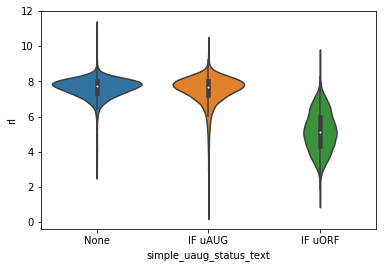

In [5]:
#Method 1) Random Sampling 
#Will try 10K RS training set from IF start, IF stop, and IF uORF for training (30K set)
ifStops = e_train[(e_train['simple_uaug_status_text'] == "None") & (e_train['stop'] == "IF Stop")].copy().reset_index(drop=True).sample(n=10000)
print ("Number training IF stops: ", ifStops.shape[0])
ifStarts = e_train[(e_train['simple_uaug_status_text'] == "IF uAUG")].copy().reset_index(drop=True).sample(n=10000)
print ("Number training IF starts: ", ifStarts.shape[0])
ifORFs = e_train[e_train['simple_uaug_status_text'] == 'IF uORF'].copy().reset_index(drop=True).sample(n=10016)
print ("Number training IF uORFs: ", ifORFs.shape[0])
concat = pd.concat([ifStops, ifStarts, ifORFs])
print (concat.shape)
concat.to_csv("randomSampleTrainingAllIFtypes.csv", )

x = sns.violinplot(x = 'simple_uaug_status_text', y = 'rl', data = concat )


total if stops:  21344
total if stops:  33876
Number training IF starts:  33876
total if stops:  19955
(30016, 42)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


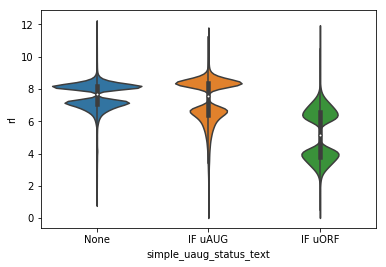

In [6]:
#Method 2) Select top and bottoms of IF types   

#Will try 10K RS training set from IF start, IF stop, and IF uORF for training (30K set)
ifStops = e_train[(e_train['simple_uaug_status_text'] == "None") & (e_train['stop'] == "IF Stop")].copy().reset_index(drop=True)
#sort if Stops, get bottom and top 5000
ifStops = ifStops.sort_values('rl')
print ("total if stops: ",  ifStops.shape[0])
bottomSetIFStops = ifStops.iloc[:5000]
topSetIFStops = ifStops.iloc[-5000:]

ifStarts = e_train[(e_train['simple_uaug_status_text'] == "IF uAUG")].copy().reset_index(drop=True)
ifStarts = ifStarts.sort_values('rl')
print ("total if stops: ",  ifStarts.shape[0])
bottomSetIFStarts = ifStarts.iloc[:5000]
topSetIFStarts = ifStarts.iloc[-5000:]

print ("Number training IF starts: ", ifStarts.shape[0])
ifORFs = e_train[e_train['simple_uaug_status_text'] == 'IF uORF'].copy().reset_index(drop=True)
ifORFs = ifORFs.sort_values('rl')
print ("total if stops: ",  ifORFs.shape[0])
bottomSetIFORFs = ifORFs.iloc[:5008]
topSetIFORFs = ifORFs.iloc[-5008:]

concat = pd.concat([bottomSetIFStops, topSetIFStops, bottomSetIFStarts, topSetIFStarts, bottomSetIFORFs, topSetIFORFs])
print (concat.shape)

concat.to_csv("extremesTrainingAllIFtypes.csv")
x = sns.violinplot(x = 'simple_uaug_status_text', y = 'rl', data = concat )


total if stops:  21344
total if stops:  33876
Number training IF starts:  33876
total if stops:  19955
(15008, 42)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


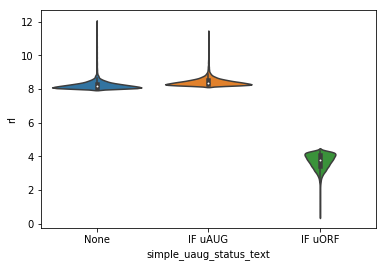

In [7]:
#Method 2) Select top and bottoms of IF types   

#Will try 10K RS training set from IF start, IF stop, and IF uORF for training (30K set)
ifStops = e_train[(e_train['simple_uaug_status_text'] == "None") & (e_train['stop'] == "IF Stop")].copy().reset_index(drop=True)
#sort if Stops, get bottom and top 5000
ifStops = ifStops.sort_values('rl')
#print (ifStops)
print ("total if stops: ",  ifStops.shape[0])
#bottomSetIFStops = ifStops.iloc[:5000]
topSetIFStops = ifStops.iloc[-5000:]

ifStarts = e_train[(e_train['simple_uaug_status_text'] == "IF uAUG")].copy().reset_index(drop=True)
ifStarts = ifStarts.sort_values('rl')
print ("total if stops: ",  ifStarts.shape[0])
#bottomSetIFStarts = ifStarts.iloc[:5000]
topSetIFStarts = ifStarts.iloc[-5000:]

print ("Number training IF starts: ", ifStarts.shape[0])
ifORFs = e_train[e_train['simple_uaug_status_text'] == 'IF uORF'].copy().reset_index(drop=True)
ifORFs = ifORFs.sort_values('rl')
print ("total if stops: ",  ifORFs.shape[0])
bottomSetIFORFs = ifORFs.iloc[:5008]
#topSetIFORFs = ifORFs.iloc[-5008:]

concat = pd.concat([topSetIFStops, topSetIFStarts, bottomSetIFORFs])
print (concat.shape)

concat.to_csv("bottom5KIFuAUGTop5KIFuAUG.csv")
x = sns.violinplot(x = 'simple_uaug_status_text', y = 'rl', data = concat )


In [8]:
#random sample test set from IF start, IF stop, IF uORF 3k
ifStops = e_test[(e_test['simple_uaug_status_text'] == "None") & (e_test['stop'] == "IF Stop")].copy().reset_index(drop=True).sample(n=1000)
print ("Number training IF stops: ", ifStops.shape[0])
ifStarts = e_test[(e_test['simple_uaug_status_text'] == "IF uAUG")].copy().reset_index(drop=True).sample(n=1000)
print ("Number training IF starts: ", ifStarts.shape[0])
ifORFs = e_test[e_test['simple_uaug_status_text'] == 'IF uORF'].copy().reset_index(drop=True).sample(n=1008)
print ("Number training IF uORFs: ", ifORFs.shape[0])
concat = pd.concat([ifStops, ifStarts, ifORFs])
print (concat.shape)
concat.to_csv("randomSampleTestingAllIFtypes.csv", )

Number training IF stops:  1000
Number training IF starts:  1000
Number training IF uORFs:  1008
(3008, 42)


Number training IF starts:  16000
Number training IF starts:  16000
(32000, 42)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


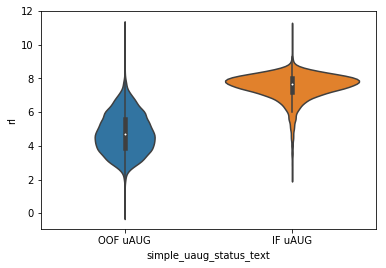

In [9]:
#upstream AUGs
#Method 1) Random Sampling 
#Will try 15K RS 
ifStarts = e_train[(e_train['simple_uaug_status_text'] == "IF uAUG")].copy().reset_index(drop=True).sample(n=16000)
print ("Number training IF starts: ", ifStarts.shape[0])
oofStarts = e_train[(e_train['simple_uaug_status_text'] == "OOF uAUG")].copy().reset_index(drop=True).sample(n=16000)
print ("Number training IF starts: ", oofStarts.shape[0])

concat = pd.concat([oofStarts, ifStarts])
print (concat.shape)
concat.to_csv("randomSampleTrainingAllAUGtypes.csv", )

x = sns.violinplot(x = 'simple_uaug_status_text', y = 'rl', data = concat )

Number training IF starts:  33876
Number training IF starts:  57893
(32000, 42)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


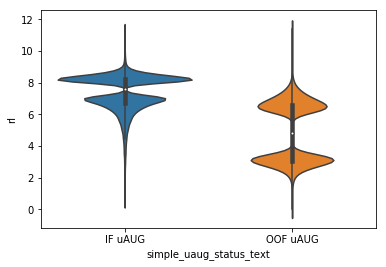

In [10]:
#upstream AUGs
#Method 1) Top and bottoms 
#Will try 15K RS 
ifStarts = e_train[(e_train['simple_uaug_status_text'] == "IF uAUG")].copy().reset_index(drop=True)
print ("Number training IF starts: ", ifStarts.shape[0])
ifStarts = ifStarts.sort_values('rl')
bottomSetIFStarts = ifStarts.iloc[:8000]
topSetIFStarts = ifStarts.iloc[-8000:]


oofStarts = e_train[(e_train['simple_uaug_status_text'] == "OOF uAUG")].copy().reset_index(drop=True)
print ("Number training IF starts: ", oofStarts.shape[0])
oofStarts = oofStarts.sort_values('rl')
bottomSetOOFStarts = oofStarts.iloc[:8000]
topSetOOFStarts = oofStarts.iloc[-8000:]

concat = pd.concat([bottomSetIFStarts, topSetIFStarts, bottomSetOOFStarts, topSetOOFStarts])
print (concat.shape)
concat.to_csv("topAndBottomTrainingAllAUGtypes.csv", )

x = sns.violinplot(x = 'simple_uaug_status_text', y = 'rl', data = concat )

Number training IF starts:  1600
Number training IF starts:  1600
(3200, 42)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


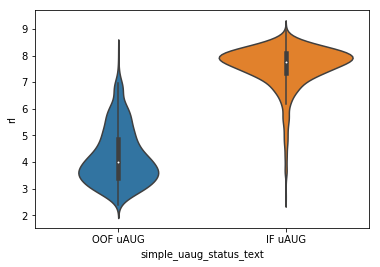

In [11]:
#upstream AUGs
#Method 1) Random Sampling 
#Will try 15K RS 
ifStarts = e_test[(e_test['simple_uaug_status_text'] == "IF uAUG")].copy().reset_index(drop=True).sample(n=1600)
print ("Number training IF starts: ", ifStarts.shape[0])
oofStarts = e_test[(e_test['simple_uaug_status_text'] == "OOF uAUG")].copy().reset_index(drop=True).sample(n=1600)
print ("Number training IF starts: ", oofStarts.shape[0])

concat = pd.concat([oofStarts, ifStarts])
print (concat.shape)
concat.to_csv("randomSampleTestingAllAUGtypes.csv", )

x = sns.violinplot(x = 'simple_uaug_status_text', y = 'rl', data = concat )